### 1. Learning Algorithm

In this project there is a implementation of the [Deep Q-Leanring Algorithm](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) to solve the [Banana Enviroment](https://classroom.udacity.com/nanodegrees/nd893/parts/6b0c03a7-6667-4fcf-a9ed-dd41a2f76485/modules/e7499d4f-24f9-42ec-9864-23adcfa4e241/lessons/69bd42c6-b70e-4866-9764-9bfa8c03cdea/concepts/319dc918-bd2c-4d3b-80a5-063bb5f1905a). The objective is to teach an agent to navigate in a 3D world to collect yellow bananas and avoid the blue ones. All the implemantation is avaliable in the [Training Notebook](Navigation_Training.ipynb) notebook.

The Deep Q-Learning Algorithm is an algorithm that enable us to solve Reinforce Learning problems using Neural Networks. This algorithm aims to use a neuron network to represent the optimal value function. And has two main features to reduce the instabilities of the network: **Fixed Q-Targets** and **Experience Replay**.

The Experience Replay was proposed to make a better use of the exeperiences of the agent. It consists in store all the experiences of the agent in a buffer and every time we want to update the newtwork we sample a batch of these experiences in the buffer. The Experience Replay allow us to use the same experience multiple times an avoid some warmful correlations that may appear when we select sequential experiences.

The Fixed Q_Targets was proposed to reduce the instabilities in the network during the training. The idea consist in have two identical neuron networks. One, **the local** which we will be update and the **target network** which will be used to generate the target values for the first one and will be softly update with the weights **of the local ntwork** from time to time. This is to avoid a moving target, i.e, using the same network to generate the targets.

The code implementation in the project is an adaptation of the code used to solve the LunarLander-v2 environment from Udacity Lesson Deep Q-Networks.

#### Neuron Network Archteture

The Neuron Network Archteture used was the following:

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)

        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

#### Chosen Hyperparameters

The Hyperparameters choosen were the following:

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

Obs: No Hyperparameter tuning was done. In the first try with this parameters teh agent was able to solve the enviroment in less than 400 episodes

### 2.Plot of Rewards

The enviroment is considered solved when the agent is able to receive an average reward of at least +13 over 100 episodes. The agent was able to solve the enviroment in 374 episodes. Below there is a plot of rewards per episode of the agent.

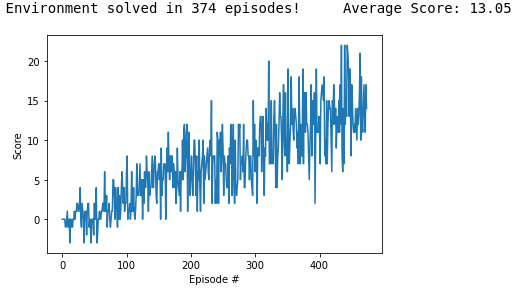

### Ideas for Future Work

There are some imporvements that may be worth to be done in order to make the agent to solve the enviroment faster.
1. Do a hyperparameter tuning.
2. Implement some improvements in the Deep Q-Learning like : Double DQN, Prioritizing Experince Replay, Dueling DQN.
3. Make the Agent Learn from raw Pixels.